In [16]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
browser = webdriver.Chrome('C:/Users/sdh20/Desktop/playwithdata/chromedriver.exe')
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

C:\Users\sdh20\AppData\Local\Temp/ipykernel_35544/1296148895.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/sdh20/Desktop/playwithdata/chromedriver.exe')


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 98
Current browser version is 100.0.4896.75 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	Ordinal0 [0x012169A3+2582947]
	Ordinal0 [0x011AA6D1+2139857]
	Ordinal0 [0x010A3A98+1063576]
	Ordinal0 [0x010C33B8+1192888]
	Ordinal0 [0x010BF235+1176117]
	Ordinal0 [0x010BC9E1+1165793]
	Ordinal0 [0x010ECFFF+1363967]
	Ordinal0 [0x010ECC2A+1362986]
	Ordinal0 [0x010E8366+1344358]
	Ordinal0 [0x010C5176+1200502]
	Ordinal0 [0x010C6066+1204326]
	GetHandleVerifier [0x013BBE02+1675858]
	GetHandleVerifier [0x0147036C+2414524]
	GetHandleVerifier [0x012ABB01+560977]
	GetHandleVerifier [0x012AA8D3+556323]
	Ordinal0 [0x011B020E+2163214]
	Ordinal0 [0x011B5078+2183288]
	Ordinal0 [0x011B51C0+2183616]
	Ordinal0 [0x011BEE1C+2223644]
	BaseThreadInitThunk [0x77ADFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77C27A7E+286]
	RtlGetAppContainerNamedObjectPath [0x77C27A4E+238]


In [13]:
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')


NameError: name 'browser' is not defined

In [40]:
result = []
for page in range(1 ,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 >a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        result.append(data)


In [58]:
df = pd.DataFrame(result)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('youtube_rank.xlsx', index=False)

In [143]:
# 유튜브 랭킹 데이터 시각화하기
import matplotlib.pyplot as plt


#폰트 깨짐 방지 코드
from matplotlib import font_manager, rc
import platform
if platform.system() == "Windows":
    path = 'C:/Windows/Fonts/HANBatang.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Darwin":
     rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [117]:
df = pd.read_excel('./youtube_rank.xlsx')
df.head()


,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7260만,227억4803만,396개
1,HYBE LABELS,[음악/댄스/가수],6430만,216억4667만,796개
2,BANGTANTV,[음악/댄스/가수],6430만,153억0107만,"1,678개"
3,SMTOWN,[음악/댄스/가수],3000만,238억7919만,"3,867개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [61]:
df.tail()

,title,category,subscriber,view,video
995,스튜디오V [ STUDIO V ],[TV/방송],57만,1억7718만,356개
996,은하캠핑,[TV/방송],57만,1억1794만,227개
997,효크포크 Krazy girl,[TV/방송],57만,1억4025만,130개
998,TAU,[취미/라이프],57만,3억5638만,111개
999,Ed Sheeran - Topic,[미분류],57만,16억4639만,568개


In [63]:
df['subscriber'][0:10]

0    7260만
1    6430만
2    6430만
3    3000만
4    2650만
5    2490만
6    2390만
7    2380만
8    1930만
9    1760만
Name: subscriber, dtype: object

In [82]:
df['replaced_subscriber'] = df['subscriber'].str.replace("만",'0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7260만,227억4803만,396개,72600000
1,HYBE LABELS,[음악/댄스/가수],6430만,216억4667만,796개,64300000
2,BANGTANTV,[음악/댄스/가수],6430만,153억0107만,"1,678개",64300000
3,SMTOWN,[음악/댄스/가수],3000만,238억7919만,"3,867개",30000000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [85]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype(int) # int 형으로 형변환 함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [89]:
pivot_table = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_table.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93100000,63
[IT/기술/컴퓨터],8730000,8
[TV/방송],251850000,147
[게임],71770000,69
[교육/강의],25250000,21


In [91]:
# replaced_subscriber 컬럼의 각 row 의 개수와 개별 값들의 합을 구하자
pivot_table.columns = ['subscriber_sum', 'category_count']
pivot_table.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93100000,63
[IT/기술/컴퓨터],8730000,8
[TV/방송],251850000,147
[게임],71770000,69
[교육/강의],25250000,21


In [93]:
# 보기 좋게 정렬
pivot_table = pivot_table.reset_index()
pivot_table.head()

,index,category,subscriber_sum,category_count
0,0,[BJ/인물/연예인],93100000,63
1,1,[IT/기술/컴퓨터],8730000,8
2,2,[TV/방송],251850000,147
3,3,[게임],71770000,69
4,4,[교육/강의],25250000,21


In [99]:
# 내림 차순
pivot_df = pivot_table.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,index,category,subscriber_sum,category_count
12,12,[음악/댄스/가수],736240000,170
17,17,[키즈/어린이],269210000,88
2,2,[TV/방송],251850000,147
11,11,[음식/요리/레시피],192640000,82
7,7,[미분류],117300000,133


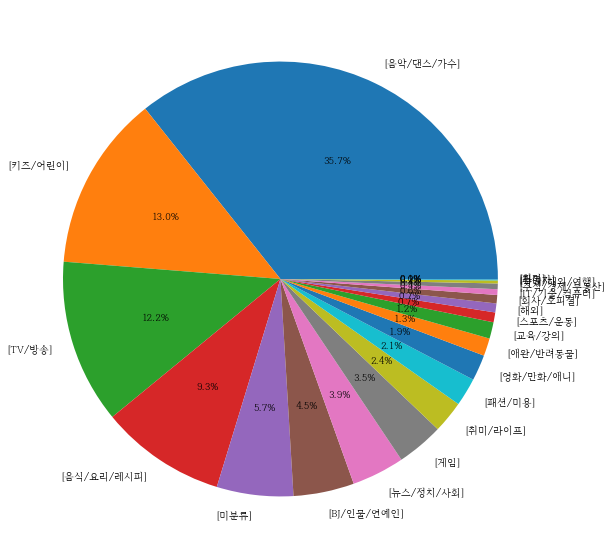

In [145]:
plt.figure(figsize=(40, 10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()
        

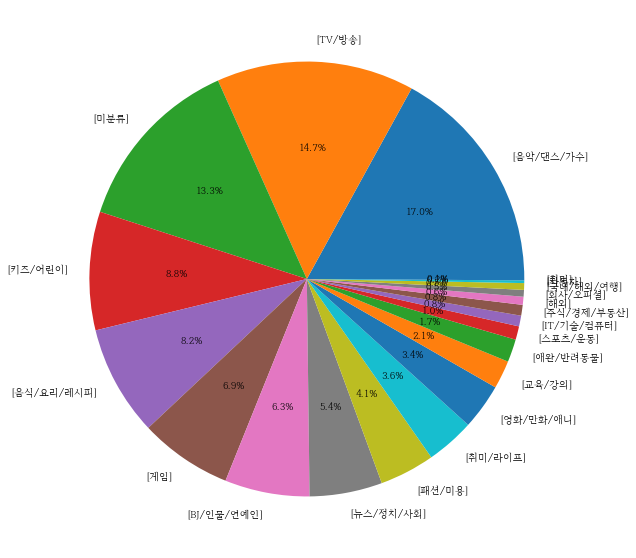

In [146]:

pivot_df = pivot_table.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize=(30, 10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()
        